In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("indian-ev-data.csv")
df=df.dropna()
df = df.rename(columns={'Vehicle Type': 'Vehicle_Type'})

In [4]:
numerical_features=['Battery Capacity (kWh)','Range per Charge (km)','Charging Time','Price','Power (HP or kW)','Top Speed (km/h)','Year of Manufacture']
x = df.loc[:, numerical_features].values
y = df.loc[:,['Vehicle_Type']].values
x = StandardScaler().fit_transform(x)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [6]:
finalDf = pd.concat([principalDf, df[['Vehicle_Type']]], axis = 1)
finalDf

,principal component 1,principal component 2,Vehicle_Type
0,0.316329,-0.479848,Scooter
1,-0.537881,-0.022801,Scooter
2,0.059229,-3.021125,Scooter
3,-1.887729,-0.331160,Scooter
4,-2.475530,-0.404575,Scooter
5,6.048049,-0.639653,Bike
6,1.911346,-0.315819,Bike
7,0.059229,-3.021125,Scooter
8,0.509615,-0.552361,Scooter
9,-0.537881,-0.022801,Scooter


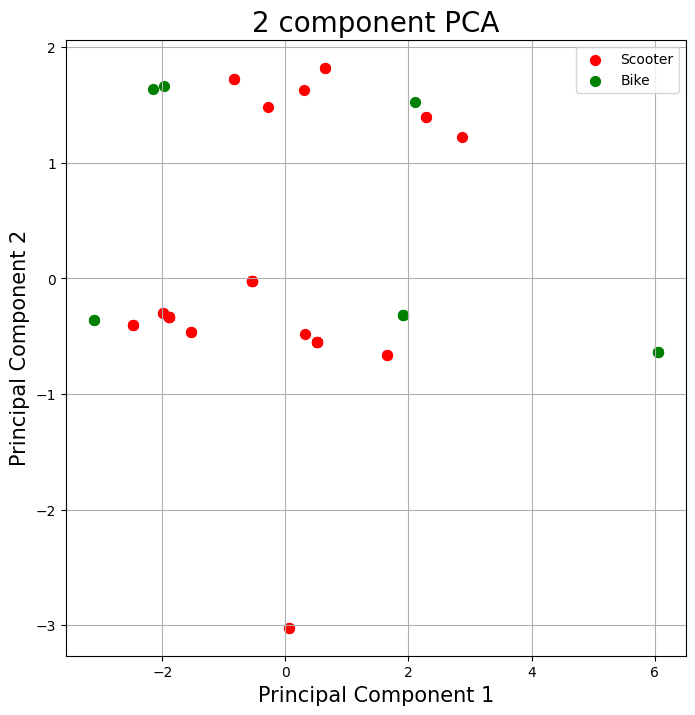

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Scooter', 'Bike']
colors = ['r', 'g']
for Vehicle_Type, color in zip(targets,colors):
    indicesToKeep = finalDf['Vehicle_Type'] == Vehicle_Type
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [8]:
pca.explained_variance_ratio_

array([0.68476839, 0.16054303])

<Figure size 1600x1000 with 0 Axes>

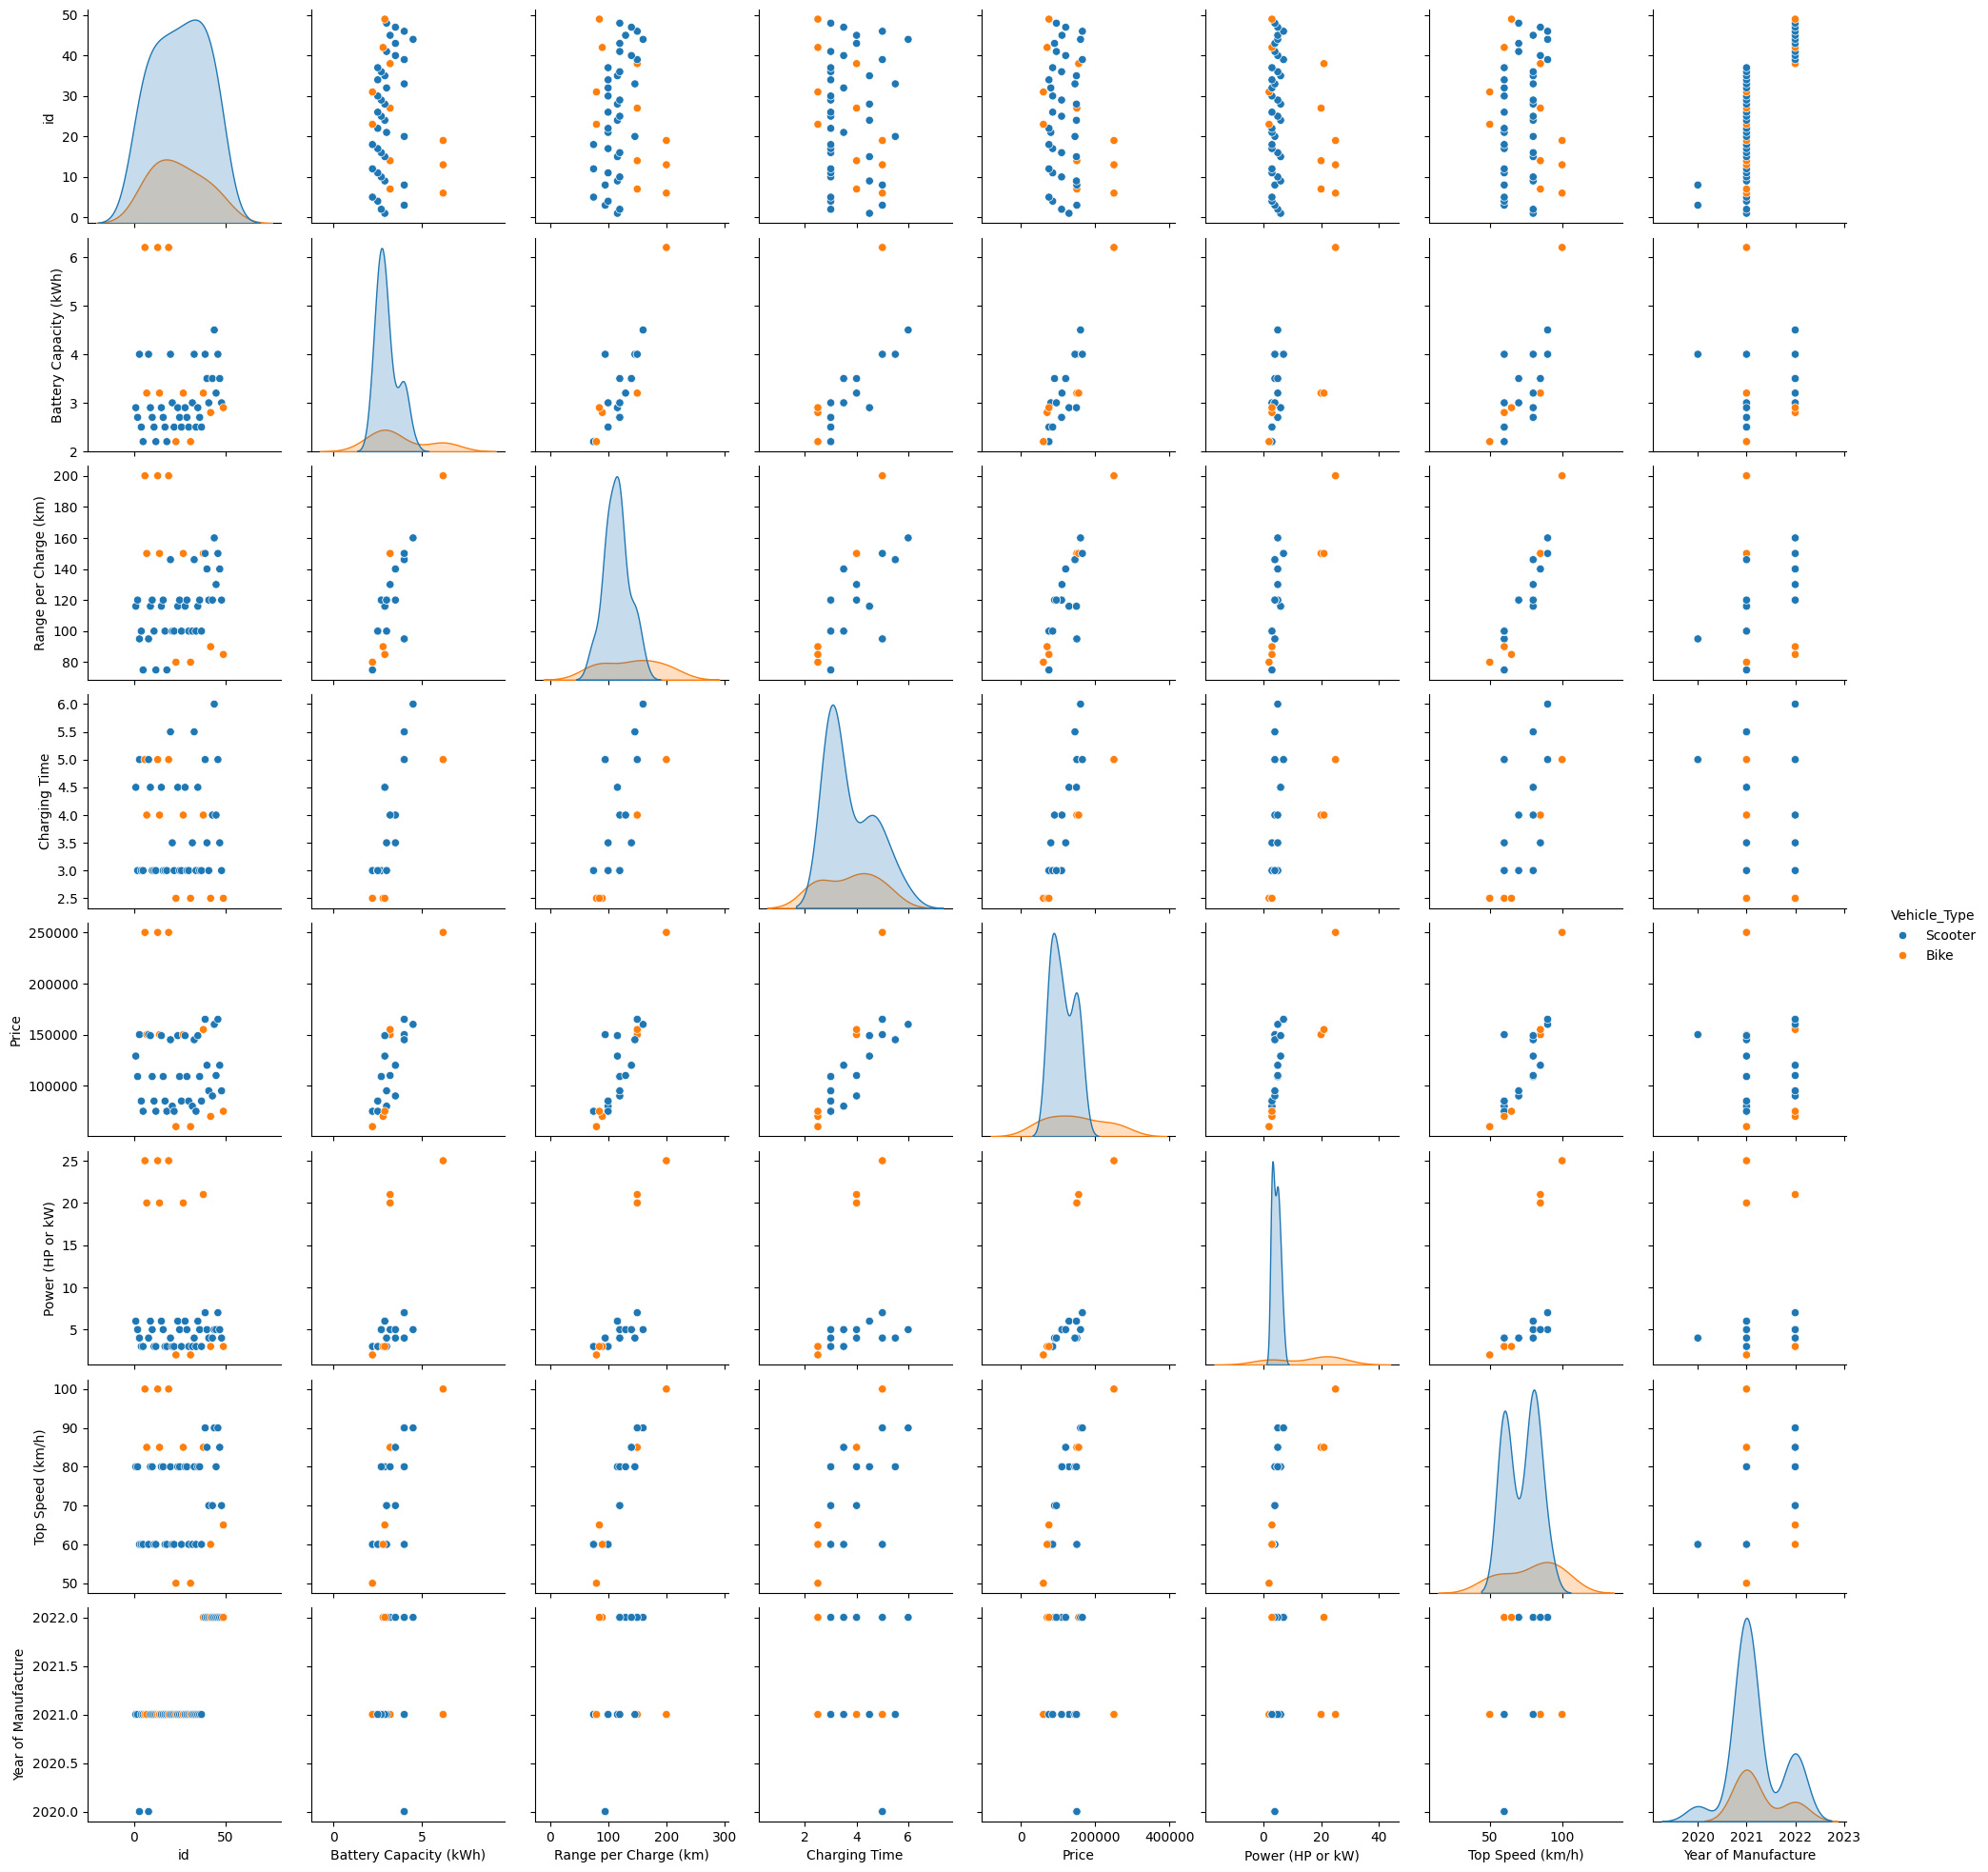

In [9]:
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue='Vehicle_Type')
plt.show()

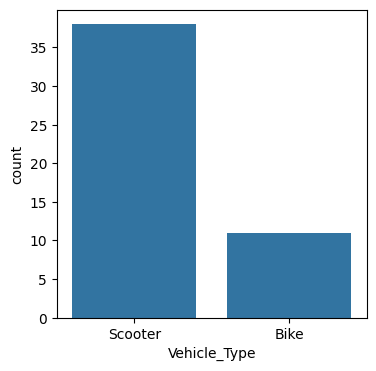

In [10]:
plt.figure(1, figsize=(4,4))
sns.countplot(x='Vehicle_Type', data=df)
plt.show()

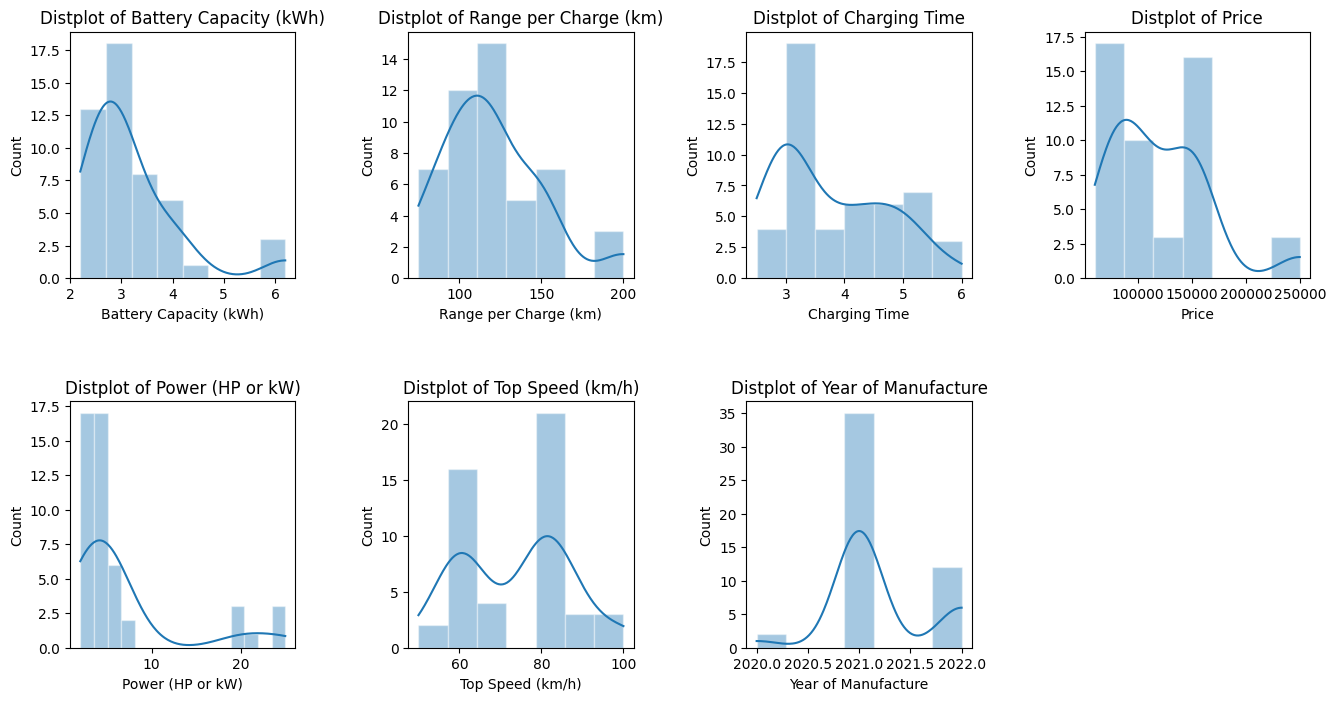

In [11]:
plt.figure(1, figsize=(16,8))
n = 0
for x in ['Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time', 'Price','Power (HP or kW)','Top Speed (km/h)','Year of Manufacture']:
    n += 1
    plt.subplot(2, 4, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.histplot(df[x],kde=True,alpha=.4, edgecolor=(1, 1, 1, .4))
    plt.title('Distplot of {}'.format(x))
plt.show()

##Extracting Segment

###K-means
####Let's perform clustering (optimizing K with the elbow method)

In [12]:
X = df.iloc[:, -2:]

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

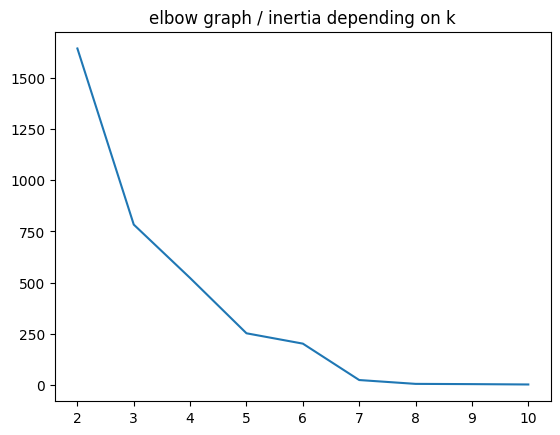

In [14]:
km_inertias, km_scores = [], []

for k in range(2, 11):
    km = KMeans(n_clusters=k).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))

#sns.lineplot(data=(range(2, 11), km_inertias))
sns.lineplot(x=range(2,11),y=km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()

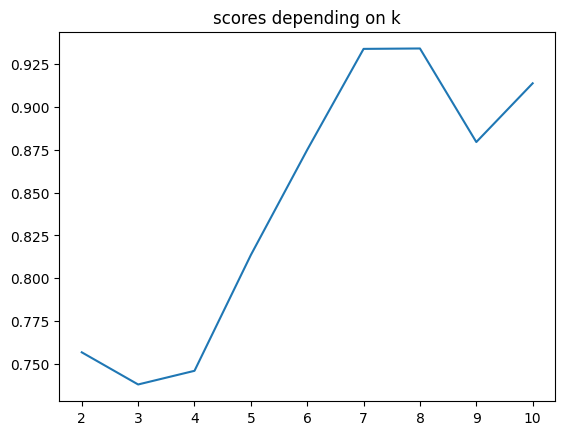

In [15]:
sns.lineplot(x=range(2, 11), y=km_scores)
plt.title('scores depending on k')
plt.show()

#####Now let's apply K-means on more than 2 features.

In [16]:
X = df.iloc[:, -3:]

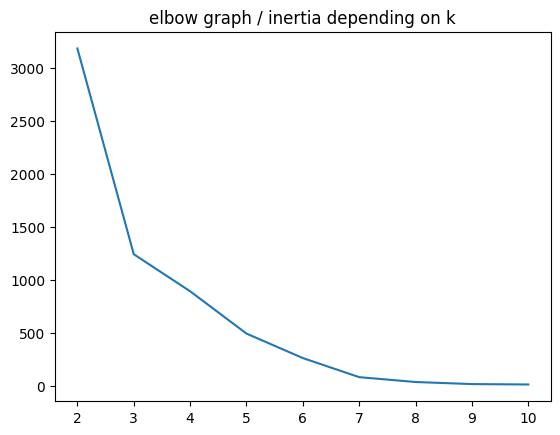

In [17]:
km_inertias, km_scores = [], []

for k in range(2, 11):
    km = KMeans(n_clusters=k).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))

sns.lineplot(x=range(2, 11),y=km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()

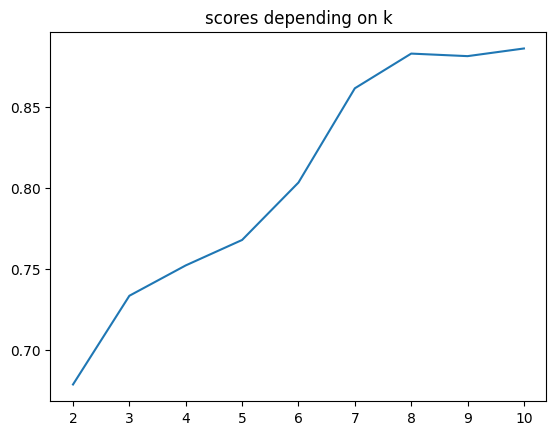

In [18]:
sns.lineplot(x=range(2, 11), y=km_scores)
plt.title('scores depending on k')
plt.show()

In [19]:
km = KMeans(n_clusters=5).fit(X)

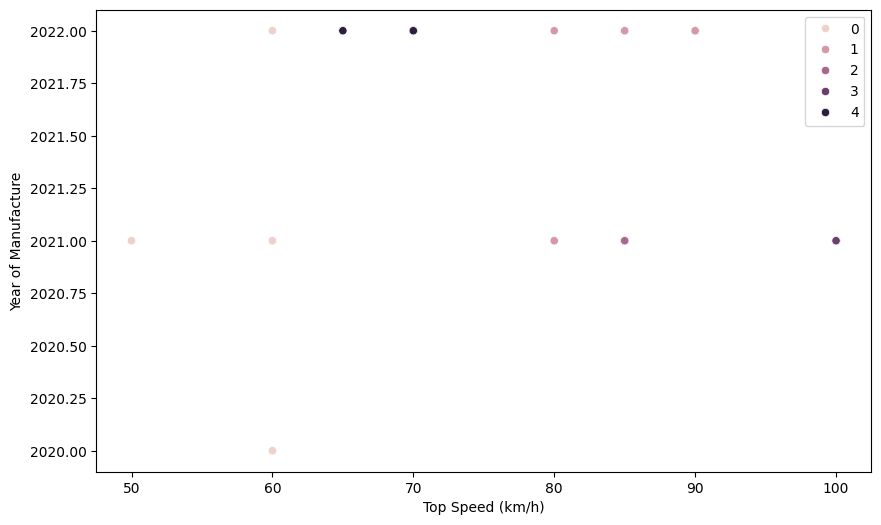

In [21]:
# K-Means visualization on pair of 2 features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 1], y=X.iloc[:, 2], hue=km.labels_)
plt.show()

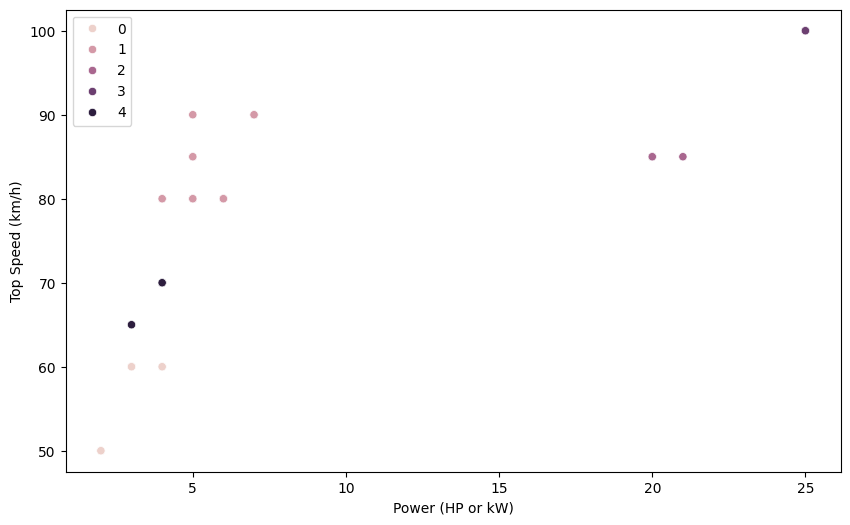

In [22]:
# K-Means visualization on another pair of 2 features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0],y=X.iloc[:, 1], hue=km.labels_)
plt.show()

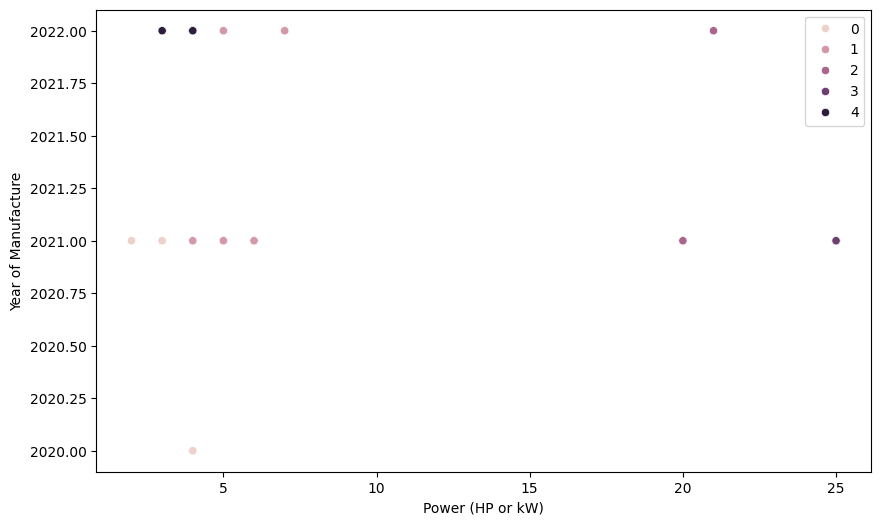

In [24]:
# K-Means visualization on the another pair of 2 features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 2], hue=km.labels_)
plt.show()

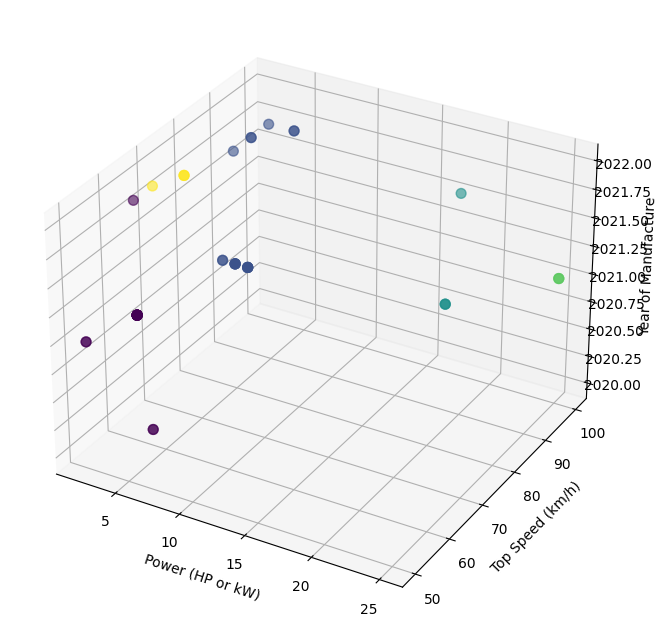

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

xs = X.iloc[:, 0]
ys = X.iloc[:, 1]
zs = X.iloc[:, 2]
ax.scatter(xs, ys, zs, s=50, alpha=0.6, c=km.labels_)

ax.set_xlabel('Power (HP or kW)')
ax.set_ylabel('Top Speed (km/h)')
ax.set_zlabel('Year of Manufacture')

plt.show()

####Definition of customers profiles corresponding to each clusters

In [31]:
# Profiles of customers
X['label'] = km.labels_

In [32]:
X.label.value_counts()

,count
label,
1,20
0,18
2,4
4,4
3,3


In [33]:
for k in range(5):
    print(f'cluster nb : {k}')
    print(X[X.label == k].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

cluster nb : 0
       Power (HP or kW)  Top Speed (km/h)  Year of Manufacture
count              18.0         18.000000            18.000000
mean                3.0         58.888889          2020.944444
min                 2.0         50.000000          2020.000000
max                 4.0         60.000000          2022.000000



cluster nb : 1
       Power (HP or kW)  Top Speed (km/h)  Year of Manufacture
count              20.0              20.0                 20.0
mean                5.4              82.0               2021.3
min                 4.0              80.0               2021.0
max                 7.0              90.0               2022.0



cluster nb : 2
       Power (HP or kW)  Top Speed (km/h)  Year of Manufacture
count              4.00               4.0                 4.00
mean              20.25              85.0              2021.25
min               20.00              85.0              2021.00
max               21.00              85.0              2022.00



c

In [34]:
X[X.label == 1].describe().iloc[[0, 1, 3, 7], :-1]

,Power (HP or kW),Top Speed (km/h),Year of Manufacture
count,20.0,20.0,20.0
mean,5.4,82.0,2021.3
min,4.0,80.0,2021.0
max,7.0,90.0,2022.0
